# Sentiment Analysis of ChatGPT App Reviews Using Python

In [1]:
import pandas as pd

ChatGPT_review = pd.read_csv("C:\\Users\\VINIT SANDESH\\Desktop\\PROJECT\\chatgpt_reviews.csv")

In [2]:
ChatGPT_review

,date,title,review,rating
0,21-05-2023 16:42,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4
1,11-07-2023 12:24,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4
2,19-05-2023 10:16,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4
3,27-05-2023 21:57,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4
4,09-06-2023 07:49,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4
...,...,...,...,...
2287,19-05-2023 00:17,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5
2288,18-05-2023 19:13,Superb AI,I’ve been using chat and have been a proud pre...,5
2289,18-05-2023 18:27,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5
2290,18-05-2023 17:17,"Awesome technology, deplorable tactics",Sam Altman’s blatant attempt at regulatory cap...,2


# 1. Data Cleaning & Exploration

In [3]:
ChatGPT_review.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2292 non-null   object
 1   title   2292 non-null   object
 2   review  2292 non-null   object
 3   rating  2292 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 71.8+ KB


In [5]:
ChatGPT_review.nunique()

date      2004
title     2058
review    2256
rating       5
dtype: int64

In [7]:
ChatGPT_review.isnull().sum()

date      0
title     0
review    0
rating    0
dtype: int64

In [25]:
ChatGPT_review.rename(columns = {"rating" : "Rating"}, inplace = True )
ChatGPT_review.rename(columns = {"review" : "Review"}, inplace = True )
ChatGPT_review.rename(columns = {"title" : "Title"}, inplace = True )
ChatGPT_review.rename(columns = {"date" : "Date"}, inplace = True )

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
ChatGPT_review.head(10)

,Date,Title,Review,Rating
0,21-05-2023 16:42,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4
1,11-07-2023 12:24,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4
2,19-05-2023 10:16,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4
3,27-05-2023 21:57,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4
4,09-06-2023 07:49,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4
5,31-05-2023 10:20,App review,"No doubt, this technology is absolutely life-c...",1
6,23-06-2023 08:10,Almost perfect except for…,Please provide a TABLET experience on iPad wit...,3
7,04-07-2023 19:02,"Chat GPT: The Underrated Buddy in Your Pocket""","Chat GPT is seriously underrated, dude! I mean...",4
8,18-05-2023 21:10,Nice and quick!,"On this app, as opposed to on the website, it ...",5
9,15-06-2023 15:39,The app of all apps for AI,There’s been times of apps touting they are ch...,5


# 2. Analysis of Rating Trends

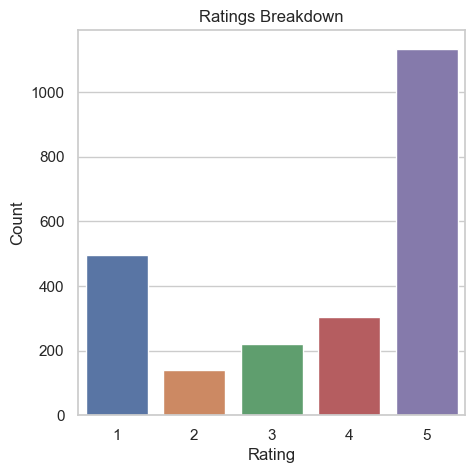

In [57]:
sns.set(style="whitegrid")

plt.figure(figsize=(5,5))

sns.countplot(data=ChatGPT_review, x='Rating')

plt.title('Ratings Breakdown')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

In [33]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


# Textblob_Sentiment_Analysis

In [34]:
from textblob import TextBlob

In [37]:
def textblob_Sentiment_Analysis(Review):
    
    Sentiment_Analysis = TextBlob(Review).sentiment
    
    if Sentiment_Analysis.polarity > 0.1:
        return "Positive"
    elif Sentiment_Analysis.polarity < -0.1:
        return "Negative"
    else: 
        return "Neutral"
    

In [41]:
ChatGPT_review['Sentiment']=ChatGPT_review['Review'].apply(textblob_Sentiment_Analysis)
ChatGPT_review

,Date,Title,Review,Rating,Sentiment
0,21-05-2023 16:42,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,Positive
1,11-07-2023 12:24,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,Positive
2,19-05-2023 10:16,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,Positive
3,27-05-2023 21:57,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,Positive
4,09-06-2023 07:49,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,Positive
...,...,...,...,...,...
2287,19-05-2023 00:17,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5,Negative
2288,18-05-2023 19:13,Superb AI,I’ve been using chat and have been a proud pre...,5,Positive
2289,18-05-2023 18:27,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5,Positive
2290,18-05-2023 17:17,"Awesome technology, deplorable tactics",Sam Altman’s blatant attempt at regulatory cap...,2,Negative


# Sentiment Breakdown Analysis

In [43]:
Sentiment_Breakdown = ChatGPT_review['Sentiment'].value_counts()

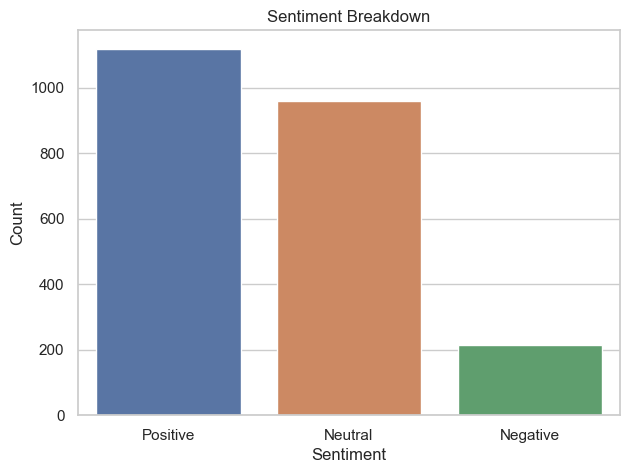

In [52]:
plt.figure(figsize=(7, 5))
sns.barplot(x=Sentiment_Breakdown.index, y=Sentiment_Breakdown.values)

plt.title('Sentiment Breakdown')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

# Relationship between the sentiments and the ratings

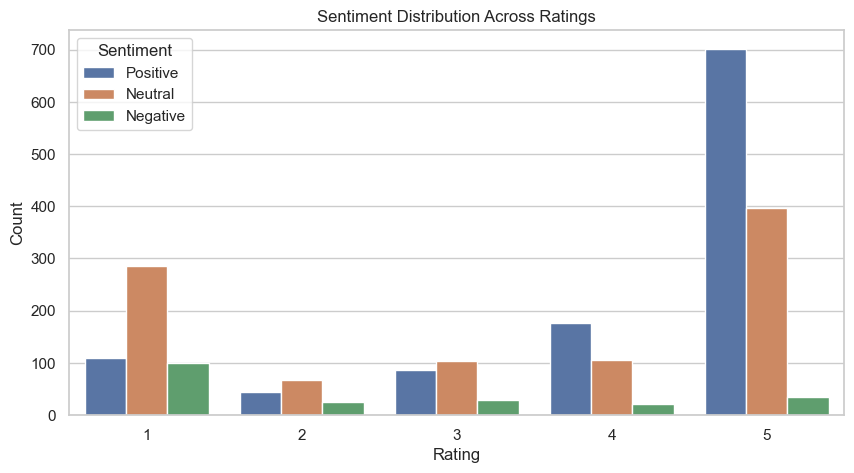

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ChatGPT_review, x='Rating', hue='Sentiment')

plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')

plt.show()